### Preparación del Ambiente

In [23]:
# Importar Librerías.
import pandas as pd
import numpy as np

In [24]:
# Cargar datos.
data = pd.read_csv("DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES CONCATENADOS.csv")
data.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,ubi
0,2022-01-01 00:00:00,2.36,19.8,48.4,68.0,5.0,142.0,111.00,715.7,0.0,59.0,4.0,0.0,21.65,6.5,285.0,SURESTE
1,2022-01-01 01:00:00,2.29,10.8,44.5,55.1,6.0,168.0,112.16,715.5,0.0,59.0,4.6,0.0,21.21,7.1,284.0,SURESTE
2,2022-01-01 02:00:00,2.71,28.3,47.1,75.2,4.0,203.0,139.31,715.4,0.0,62.0,5.9,0.0,21.21,7.7,290.0,SURESTE
3,2022-01-01 03:00:00,2.31,19.6,42.1,61.5,5.0,262.0,177.68,715.1,0.0,59.0,5.5,0.0,20.44,8.2,294.0,SURESTE
4,2022-01-01 04:00:00,1.85,13.0,39.5,52.5,4.0,185.0,134.21,715.1,0.0,59.0,4.9,0.0,19.80,8.1,287.0,SURESTE


In [25]:
data.describe()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
count,184504.000000,184952.000000,186371.000000,186398.000000,184806.000000,185393.000000,154765.000000,187318.000000,188649.000000,178293.000000,178294.000000,184750.000000,188161.000000,185261.000000,184055.000000
mean,1.303577,11.085188,15.229053,26.163776,26.252653,61.728583,20.832239,715.660217,0.005135,55.007948,4.824373,-0.490102,23.423220,8.981050,127.991785
std,0.661850,18.699018,11.845714,26.638827,17.838259,42.744224,15.070802,9.574068,0.253273,39.892455,4.299760,80.584401,7.805767,5.608518,99.954131
min,-0.130000,0.300000,0.000000,0.500000,0.700000,2.000000,0.000000,655.400000,0.000000,-9999.000000,0.500000,-9999.000000,-4.000000,0.100000,-9999.000000
25%,0.780000,3.200000,7.000000,11.300000,13.000000,36.000000,11.000000,710.000000,0.000000,38.000000,3.000000,0.000000,18.580000,5.000000,67.000000
50%,1.270000,5.000000,11.800000,17.600000,23.000000,52.000000,17.210000,714.900000,0.000000,56.000000,3.900000,0.007000,24.270000,8.200000,107.000000
75%,1.700000,10.400000,19.900000,30.100000,35.100000,75.000000,27.000000,722.100000,0.000000,73.000000,5.400000,0.271000,28.790000,12.300000,154.000000
max,7.460000,380.800000,167.800000,410.300000,171.000000,1001.000000,406.520000,747.600000,67.800000,190.000000,222.900000,7.655000,112.390000,188.800000,360.000000


### Limpieza de Datos

In [26]:
# Eliminar registros duplicados.
data = data.drop_duplicates()

In [27]:
# Replazar registros "NULL" por registros nulos de numpy.
data = data.replace("NULL", np.nan)

In [28]:
# Vectorizar variable "ubi".
ubi_dic = {
 'SURESTE':1, 'NORESTE':2, 'CENTRO':3, 'NOROESTE':4, 'SUROESTE':5,
 'NOROESTE2':6, 'NORTE':7, 'SUROESTE2':8, 'SURESTE2':9, 'SURESTE3':10,
 'SUR':11, 'NORTE2':12, 'NORESTE2':13, 'NORESTE3':14, 'NOROESTE3':15}
data = data.replace({"ubi": ubi_dic})

In [29]:
# Eliminar registros negativos (exceptuando TOUT).
data = data[(data[data.columns[1:13]] >= 0).all(axis=1) & (data[data.columns[14:]] >= 0).all(axis=1)]

In [30]:
# Función | Remplazar outliers por registros nulos de numpy.
def replace_outliers_nan(column):
    mean = column.mean()
    std_dev = column.std()
    z_scores = (column - mean) / std_dev
    return column.mask(abs(z_scores) > 3)

In [9]:
# Remplazar outliers.
"""for col in list(data.columns)[1:]:
    data[col] = replace_outliers_nan(data[col])"""

'for col in list(data.columns)[1:]:\n    data[col] = replace_outliers_nan(data[col])'

In [31]:
# Eliminar registros nulos.
data = data.dropna()

In [32]:
# Ajustar indice
data = data.reset_index(drop=True)

In [33]:
# Separar columna "date".
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['year'] = data["date"].dt.year
data['date'] = pd.to_datetime(data['date']).dt.day_of_year

data.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,ubi,hour,year
0,1,2.36,19.8,48.4,68.0,5.0,142.0,111.00,715.7,0.0,59.0,4.0,0.0,21.65,6.5,285.0,1,0,2022
1,1,2.29,10.8,44.5,55.1,6.0,168.0,112.16,715.5,0.0,59.0,4.6,0.0,21.21,7.1,284.0,1,1,2022
2,1,2.71,28.3,47.1,75.2,4.0,203.0,139.31,715.4,0.0,62.0,5.9,0.0,21.21,7.7,290.0,1,2,2022
3,1,2.31,19.6,42.1,61.5,5.0,262.0,177.68,715.1,0.0,59.0,5.5,0.0,20.44,8.2,294.0,1,3,2022
4,1,1.85,13.0,39.5,52.5,4.0,185.0,134.21,715.1,0.0,59.0,4.9,0.0,19.80,8.1,287.0,1,4,2022


### Dataset de clases

In [34]:
# Generar nuevo dataset "flags" como copia de data.
flags = data.copy()

In [35]:
# Generar etiqueta de clase para variable objetivo "O3".
flags['O3'] = flags['O3'].apply(lambda x: 1 if x >= 90 else 0)

In [36]:
# Calcular media agrupadas por día y año de "PM10".
result_df = flags.groupby(['date', 'year'])['PM10'].mean().reset_index()
# Remplazar registros de "PM10" por su emdia agrupada en día y año.
flags = flags.drop("PM10", axis = 1)
flags = flags.merge(result_df, left_on=['date', 'year'], right_on=['date', 'year'], how='left')

# Calcular media agrupadas por día y año de "PM2.5".
result_df = flags.groupby(['date', 'year'])['PM2.5'].mean().reset_index()
# Remplazar registros de "PM2.5" por su emdia agrupada en día y año.
flags = flags.drop("PM2.5", axis = 1)
flags = flags.merge(result_df, left_on=['date', 'year'], right_on=['date', 'year'], how='left')

# Generar etiqueta de clase para variables objetivo "PM10", "PM2.5".
flags['PM10'] = flags['PM10'].apply(lambda x: 1 if x >= 70 else 0)
flags['PM2.5'] = flags['PM2.5'].apply(lambda x: 1 if x >= 41 else 0)

In [37]:
# Visualizar insidencias de clase "PM2.5"
flags["PM2.5"].value_counts()

0    124835
1      3848
Name: PM2.5, dtype: int64

In [38]:
# Visualizar insidencias de clase "PM10"
flags["PM10"].value_counts()

0    83946
1    44737
Name: PM10, dtype: int64

In [39]:
# Visualizar insidencias de clase "O3"
flags["O3"].value_counts()

0    127767
1       916
Name: O3, dtype: int64

In [40]:
flags = flags[["PM2.5", "PM10", "O3"]]
flags.head()

,PM2.5,PM10,O3
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


### Transformación para Normalidad

In [20]:
# Transformación para Normalidad | Método: Yeo johnson
"""from scipy.stats import yeojohnson

transformed_data = data.copy()
columns_to_transform = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "PRS", "RAINF", "RH", "SO2", "SR", "WSR", "WDR", "TOUT"]
lambda_yeojonhson = {"CO":1, "NO":1, "NO2":1, "NOX":1, "O3":1, "PM10":1, "PM2.5":1, "PRS":1, "RAINF":1, "RH":1, "SO2":1, "SR":1, "WSR":1, "WDR":1, "TOUT":1}

for col in list(columns_to_transform):
    transformed_col, lambda_val = yeojohnson(data[col])
    lambda_yeojonhson[col] = lambda_val
    transformed_data[col] = transformed_col"""

In [22]:
# Prueba de Normalidad | Prueba: Anderson-Darling
"""from scipy.stats import anderson

for col in columns_to_transform:
    print(f"Columna: {col}")
    
    result = anderson(transformed_data[col])
    statistic = result.statistic
    critical_value = result.critical_values[2]  # 0.5 significance level
    
    if statistic < critical_value:
        print(f"    Estadístico: {statistic}, Resultado: Se aparenta distribución normal")
    else:
        print(f"    Estadístico: {statistic}, Resultado: No se aparenta distribución normal")"""

Columna: CO
    Estadístico: 97.87550525383267, Resultado: No se aparenta distribución normal
Columna: NO
    Estadístico: 1148.9015336293378, Resultado: No se aparenta distribución normal
Columna: NO2
    Estadístico: 106.07117358664982, Resultado: No se aparenta distribución normal
Columna: NOX
    Estadístico: 93.09193761007919, Resultado: No se aparenta distribución normal
Columna: O3
    Estadístico: 180.65698156144936, Resultado: No se aparenta distribución normal
Columna: PM10
    Estadístico: 109.51078553737898, Resultado: No se aparenta distribución normal
Columna: PM2.5
    Estadístico: 34.543647503407556, Resultado: No se aparenta distribución normal
Columna: PRS
    Estadístico: 329.3979966133629, Resultado: No se aparenta distribución normal
Columna: RAINF
    Estadístico: 49383.7053113188, Resultado: No se aparenta distribución normal
Columna: RH
    Estadístico: 691.0243093823374, Resultado: No se aparenta distribución normal
Columna: SO2
    Estadístico: 77.135163228129

In [23]:
# Prueba de Normalidad | Prueba: Kolmogorov-Smirnov
"""from scipy.stats import kstest

for col in columns_to_transform:
    print(f"Columna: {col}")
    
    column_data = transformed_data[col]
    stat_ks, p_ks = kstest(column_data, 'norm')

    if p_ks > 0.05:
        print(f"     Resultado: Se aparenta distribución normal")
    else:
        print(f"     Resultado: No se aparenta distribución normal")"""

Columna: CO
     Resultado: No se aparenta distribución normal
Columna: NO
     Resultado: No se aparenta distribución normal
Columna: NO2
     Resultado: No se aparenta distribución normal
Columna: NOX
     Resultado: No se aparenta distribución normal
Columna: O3
     Resultado: No se aparenta distribución normal
Columna: PM10
     Resultado: No se aparenta distribución normal
Columna: PM2.5
     Resultado: No se aparenta distribución normal
Columna: PRS
     Resultado: No se aparenta distribución normal
Columna: RAINF
     Resultado: No se aparenta distribución normal
Columna: RH
     Resultado: No se aparenta distribución normal
Columna: SO2
     Resultado: No se aparenta distribución normal
Columna: SR
     Resultado: No se aparenta distribución normal
Columna: WSR
     Resultado: No se aparenta distribución normal
Columna: WDR
     Resultado: No se aparenta distribución normal
Columna: TOUT
     Resultado: No se aparenta distribución normal


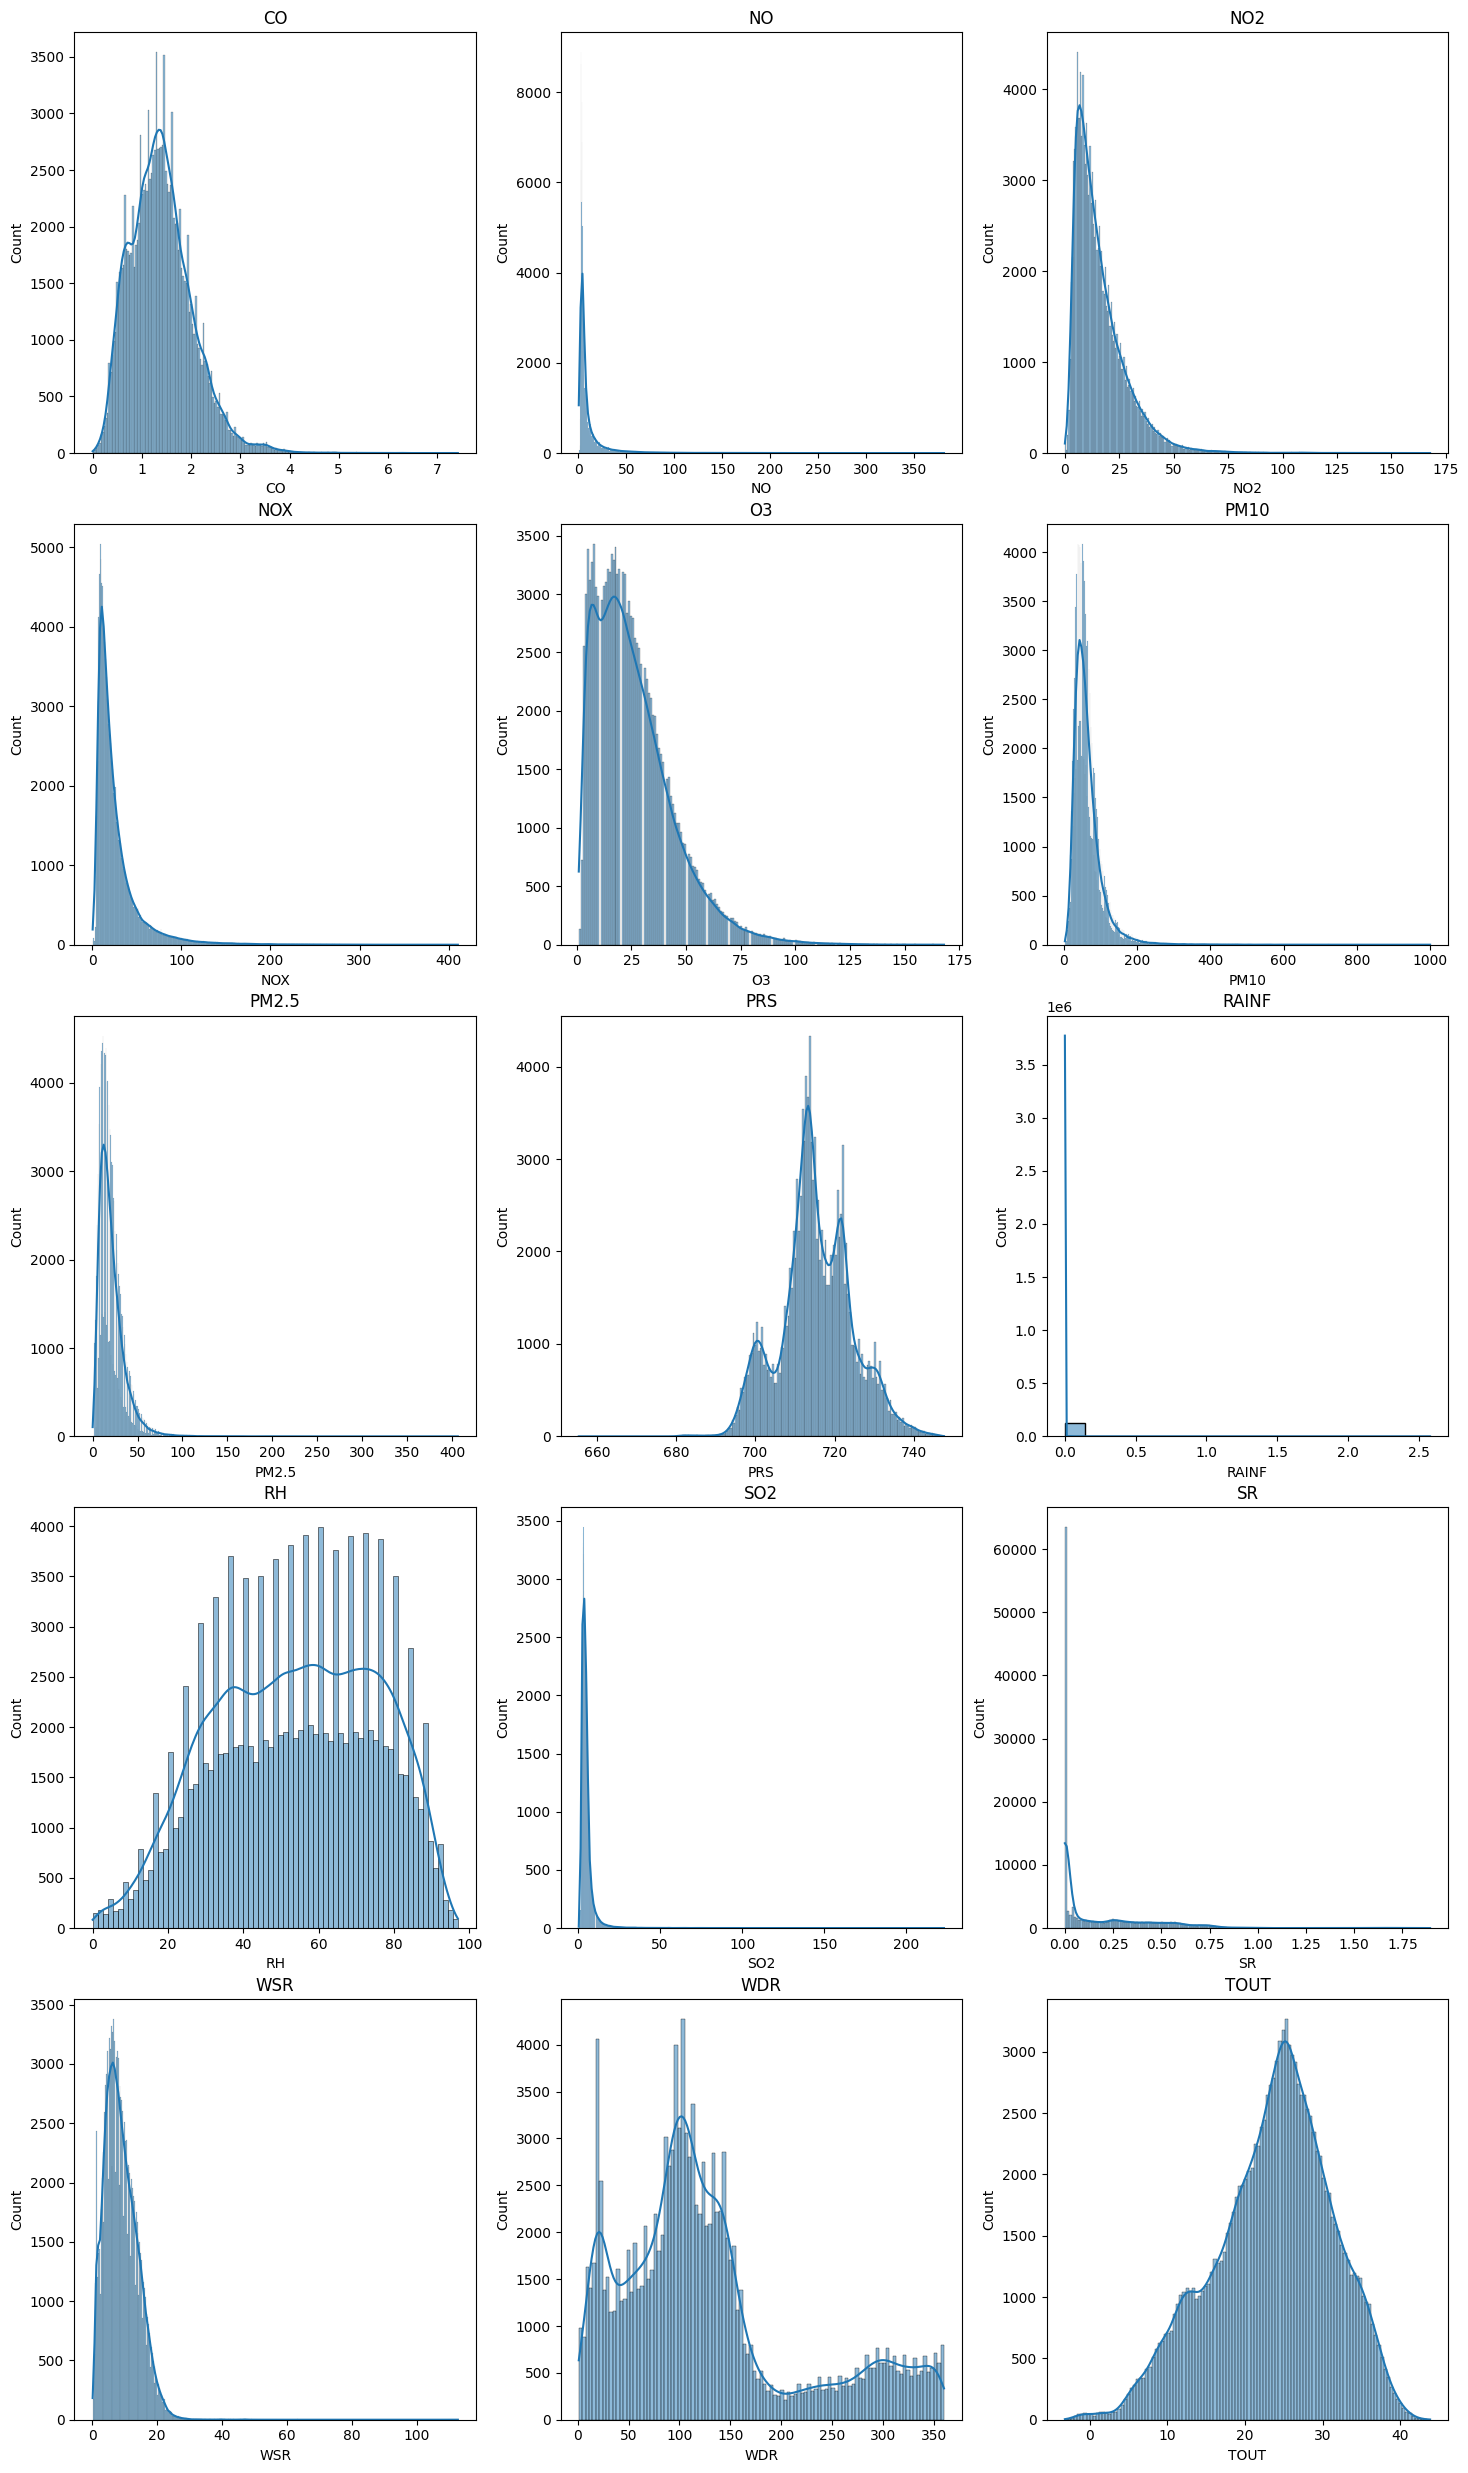

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Lista de Columnas
columns = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "PRS", "RAINF", "RH", "SO2", "SR", "WSR", "WDR", "TOUT"]

# Diseño de la cuadricula
num_cols = 3
num_rows = (len(columns) + num_cols - 1) // num_cols

# Ajustar el tamaño de la Figura
fig_width = 15
fig_height = num_rows * 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
fig.tight_layout(pad=3.0) 
axes = axes.flatten()

# Generar histogramas
for i, column in enumerate(columns):
    sns.histplot(data[column], ax=axes[i], kde=True)  # Using histplot with KDE
    axes[i].set_title(column)

for j in range(len(columns), num_rows * num_cols):
    axes[j].axis('off')

# Desplegar histogramas
plt.show()

### Acotación

In [42]:
# Varianza de datos
data.var()

date     9532.057217
CO          0.402894
NO        327.833406
NO2       145.708180
NOX       703.355473
O3        326.095809
PM10     1800.569290
PM2.5     226.036733
PRS        84.702935
RAINF       0.000415
RH        448.127037
SO2        21.073740
SR          0.058740
TOUT       58.371641
WSR        25.347217
WDR      7933.810971
ubi        13.127162
hour       46.824983
year        0.235995
dtype: float64

In [43]:
data_to_export = data[["O3", "PM10", "PM2.5", "PRS", "RH", "SR", "TOUT", "WSR", "WDR", "RAINF", "ubi", "hour", "date", "year"]]
data_to_export.head()

,O3,PM10,PM2.5,PRS,RH,SR,TOUT,WSR,WDR,RAINF,ubi,hour,date,year
0,5.0,142.0,111.00,715.7,59.0,0.0,21.65,6.5,285.0,0.0,1,0,1,2022
1,6.0,168.0,112.16,715.5,59.0,0.0,21.21,7.1,284.0,0.0,1,1,1,2022
2,4.0,203.0,139.31,715.4,62.0,0.0,21.21,7.7,290.0,0.0,1,2,1,2022
3,5.0,262.0,177.68,715.1,59.0,0.0,20.44,8.2,294.0,0.0,1,3,1,2022
4,4.0,185.0,134.21,715.1,59.0,0.0,19.80,8.1,287.0,0.0,1,4,1,2022


### Exportación

In [22]:
data.to_csv("DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES CONCATENADOS LIMPIOS COMPLETOS.csv", encoding="UTF-8")

In [27]:
data_to_export.to_csv("DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES CONCATENADOS LIMPIOS.csv", encoding="UTF-8")

In [28]:
flags.to_csv("FLAGS.csv", encoding="UTF-8")